# Loan defaults
Predict whether or not a borrower paid back their loan in full using both a decision tree and a random forest model

In [1]:
import pandas as pd
import seaborn as sns

### Explore data

In [2]:
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


<AxesSubplot:xlabel='count', ylabel='purpose'>

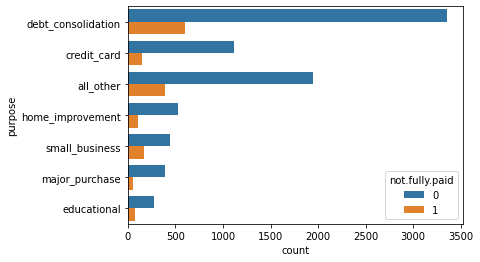

In [5]:
# Compare repayment across different loan purposes
sns.countplot(y='purpose', hue='not.fully.paid', data=df)

<AxesSubplot:xlabel='int.rate', ylabel='Count'>

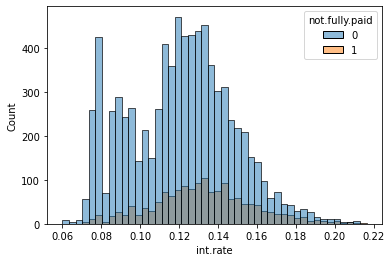

In [38]:
# Compare repayment by interest rate
sns.histplot(x='int.rate', hue='not.fully.paid', data=df)

<AxesSubplot:xlabel='fico', ylabel='Count'>

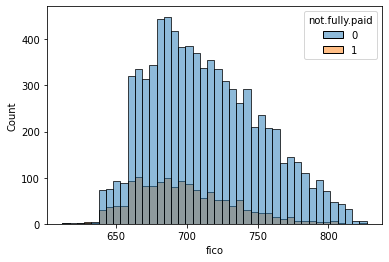

In [37]:
# Compare repayment by fico score
sns.histplot(x='fico', hue='not.fully.paid', data=df)

### Clean data

In [27]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [32]:
for col in ['credit.policy', 'purpose', 'inq.last.6mnths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']:
    print(f'{col}: {df[col].unique()}')

credit.policy: [1 0]
purpose: ['debt_consolidation' 'credit_card' 'all_other' 'home_improvement'
 'small_business' 'major_purchase' 'educational']
inq.last.6mths: [ 0  1  2  3  4  5  6  8  7 33  9 18 14 15 13 12 10 19 11 16 20 27 25 28
 31 24 17 32]
delinq.2yrs: [ 0  1  2  4  3  5  6 13  7  8 11]
pub.rec: [0 1 2 3 4 5]
not.fully.paid: [0 1]


In [34]:
# Create dummies from purpose col
df = pd.get_dummies(df, columns=['purpose'], drop_first=True)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


### Create models
Create a decision tree model and a random forest model to compare

In [39]:
target = 'not.fully.paid'
feats = [col for col in df.columns if col != target]
X = df[feats]
y = df[target]

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

# Train decision tree and random forest models
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)


# Create predictions
tree_preds = tree.predict(X_test)
forest_preds = forest.predict(X_test)


# Evaluate metrics
from sklearn.metrics import classification_report, confusion_matrix

class_tree = classification_report(y_test, tree_preds)
confuse_tree = confusion_matrix(y_test, tree_preds)

class_forest = classification_report(y_test, forest_preds)
confuse_forest = confusion_matrix(y_test, forest_preds)

print('Classification report (tree):\n', class_tree)
print('Classification report (forest):\n', class_forest)
print('Confusion matrix (tree):\n', confuse_tree)
print('Confusion matrix (forest):\n', confuse_forest)

Classification report (tree):
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      2650
           1       0.21      0.21      0.21       511

    accuracy                           0.74      3161
   macro avg       0.53      0.53      0.53      3161
weighted avg       0.74      0.74      0.74      3161

Classification report (forest):
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      2650
           1       0.35      0.01      0.03       511

    accuracy                           0.84      3161
   macro avg       0.59      0.50      0.47      3161
weighted avg       0.76      0.84      0.77      3161

Confusion matrix (tree):
 [[2230  420]
 [ 402  109]]
Confusion matrix (forest):
 [[2637   13]
 [ 504    7]]


In [40]:
df['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

  The dataset is skewed to begin with, favoring "NOT not.fully.paid" (i.e. paid in full) by greater than 5 to 1. As such, our true negatives are quite high. The improvements from the decision tree to the random forest come mainly from recall for not.fully.paid = 0. This indicates that the model does a very good job at predicting individuals who will pay back their loan in full.